In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-songs/dataset.csv


In [ ]:
# 1. ИМПОРТ БИБЛИОТЕК
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# Настройки отображения
pd.set_option('display.max_columns', None)  # Показывать все колонки
pd.set_option('display.width', 1000)        # Ширина отображения
pd.set_option('display.max_colwidth', 30)   # Максимальная ширина текста в колонках
pd.set_option('display.precision', 3)       # Округление чисел

In [5]:
df = pd.read_csv('/kaggle/input/dataset-songs/dataset.csv')

df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.032,1.010e-06,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.076,0.924,5.560e-06,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.056,0.210,0.000e+00,0.117,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Origina...,Can't Help Falling In Love,71,201933,False,0.266,0.060,0,-18.515,1,0.036,0.905,7.070e-05,0.132,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.053,0.469,0.000e+00,0.083,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain f...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.042,0.640,9.280e-01,0.086,0.034,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain f...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.040,0.994,9.760e-01,0.105,0.035,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.042,0.867,0.000e+00,0.084,0.743,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.030,0.381,0.000e+00,0.270,0.413,135.960,4,world-music



РАЗДЕЛ 1: EDA и ресерч-анализ. Графики, применение инструментов EDA.Комментарий до графика. Вывод после графика/стат методов. Корреляция колонок с таргетом
========================================================================================================

* track_id - уникальный идентификатор
* artists - исполнитель
* album_name - название трека
* popularity - популярность
* duration_ms - длительность трека
* explicit - эксплицинтность
* danceability - насколько трек подходит для танцев
* energy - энергичность
* key - тональность трека
* loudness - громкость
* mode - режим трека
* speechiness - речевая насыщенность
* acousticness - акустичность
* instrumentalness - инструментальность
* liveness - живое исполнение
* valence - позитивность
* tempo - темп
* time_signature - такт
* track_genre - жанр


основная информация
=

In [47]:

    # 1. Основная информация 
    # Размерность:
    # Строки: 114000
    # Столбцы: 21
    
    # 2. Типы данных
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} столбцов")
    
    # 3. Пропущенные значения
    missing_total = df.isnull().sum().sum()
    print(f"  Всего пропусков: {missing_total:,}")
    print(f"  Процент пропусков: {(missing_total / (df.shape[0] * df.shape[1]) * 100):.2f}%")
    
    # 4. Пропуски по столбцам
    missing_by_column = df.isnull().sum()
    if missing_by_column.sum() > 0:
        print("Пропуски по столбцам (топ-10):")
        missing_sorted = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
        for col, missing_count in missing_sorted.head(10).items():
            missing_pct = (missing_count / len(df)) * 100
            print(f"  {col}: {missing_count:,} ({missing_pct:.1f}%)")
    
    # 5. Статистика числовых столбцов
    print("СТАТИСТИКА ЧИСЛОВЫХ СТОЛБЦОВ:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']].round(2))
    
    # 6. Уникальные значения в категориальных столбцах
    print("УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols[:5]:  # Покажем только первые 5
        unique_count = df[col].nunique()
        print(f"  {col}: {unique_count:,} уникальных значений")
        
        if unique_count <= 10:
            print(f"    Значения: {df[col].unique().tolist()}")

# Запуск анализа


  float64: 10 столбцов
  int64: 6 столбцов
  object: 5 столбцов
  bool: 2 столбцов
  category: 1 столбцов
  category: 1 столбцов
  Всего пропусков: 161
  Процент пропусков: 0.01%
Пропуски по столбцам (топ-10):
  dance_category: 157 (0.1%)
  artists: 1 (0.0%)
  album_name: 1 (0.0%)
  track_name: 1 (0.0%)
  length_category: 1 (0.0%)
СТАТИСТИКА ЧИСЛОВЫХ СТОЛБЦОВ:
                       mean        std    min        max
Unnamed: 0         56999.50   32909.11   0.00  1.140e+05
popularity            33.24      22.31   0.00  1.000e+02
duration_ms       228029.15  107297.71   0.00  5.237e+06
danceability           0.57       0.17   0.00  9.800e-01
energy                 0.64       0.25   0.00  1.000e+00
key                    5.31       3.56   0.00  1.100e+01
loudness              -8.26       5.03 -49.53  4.530e+00
mode                   0.64       0.48   0.00  1.000e+00
speechiness            0.08       0.11   0.00  9.600e-01
acousticness           0.31       0.33   0.00  1.000e+00
instrument

In [51]:
# ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА И ОЧИСТКА
# 1. Удаление колонок 
cols_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']
existing_cols = [col for col in cols_to_drop if col in df.columns]

df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_minutes,length_category,dance_category,Настроение
0,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.032,1.010e-06,0.358,0.715,87.917,4,acoustic,3.844,3-4 мин,Высокая,True
1,55,149610,False,0.420,0.166,1,-17.235,1,0.076,0.924,5.560e-06,0.101,0.267,77.489,4,acoustic,2.494,<3 мин,Средняя,False
2,57,210826,False,0.438,0.359,0,-9.734,1,0.056,0.210,0.000e+00,0.117,0.120,76.332,4,acoustic,3.514,3-4 мин,Средняя,False
3,71,201933,False,0.266,0.060,0,-18.515,1,0.036,0.905,7.070e-05,0.132,0.143,181.740,3,acoustic,3.366,3-4 мин,Низкая,False
4,82,198853,False,0.618,0.443,2,-9.681,1,0.053,0.469,0.000e+00,0.083,0.167,119.949,4,acoustic,3.314,3-4 мин,Высокая,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.235,5,-16.393,1,0.042,0.640,9.280e-01,0.086,0.034,125.995,5,world-music,6.417,5-10 мин,Низкая,False
113996,22,385000,False,0.174,0.117,0,-18.318,0,0.040,0.994,9.760e-01,0.105,0.035,85.239,4,world-music,6.417,5-10 мин,Низкая,False
113997,22,271466,False,0.629,0.329,0,-10.895,0,0.042,0.867,0.000e+00,0.084,0.743,132.378,4,world-music,4.524,4-5 мин,Высокая,True
113998,41,283893,False,0.587,0.506,7,-10.889,1,0.030,0.381,0.000e+00,0.270,0.413,135.960,4,world-music,4.732,4-5 мин,Средняя,False


ГИПОТЕЗА 1: более короткие и танцевальные треки в среднем популярнее длинных и менее танцевальных
=

In [35]:
# 1. Обработка
# Создаем минуты из миллисекунд
df['duration_minutes'] = df['duration_ms'] / 60000

# Группируем песни по длительности

df['length_category'] = pd.cut(df['duration_minutes'], 
                                bins=[0, 3, 4, 5, 10, 100],
                                labels=['<3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '>10 мин'])

# Группируем по танцевальности

df['dance_category'] = pd.cut(df['danceability'],
                               bins=[0, 0.3, 0.6, 1.0],
                               labels=['Низкая', 'Средняя', 'Высокая'])
df
# duration_minutes - длительность в минутах
# length_category - группа длительности
# dance_category - уровень танцевальности

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_minutes,length_category,dance_category,Настроение
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.032,1.010e-06,0.358,0.715,87.917,4,acoustic,3.844,3-4 мин,Высокая,True
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.076,0.924,5.560e-06,0.101,0.267,77.489,4,acoustic,2.494,<3 мин,Средняя,False
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.056,0.210,0.000e+00,0.117,0.120,76.332,4,acoustic,3.514,3-4 мин,Средняя,False
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Origina...,Can't Help Falling In Love,71,201933,False,0.266,0.060,0,-18.515,1,0.036,0.905,7.070e-05,0.132,0.143,181.740,3,acoustic,3.366,3-4 мин,Низкая,False
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.053,0.469,0.000e+00,0.083,0.167,119.949,4,acoustic,3.314,3-4 мин,Высокая,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain f...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.042,0.640,9.280e-01,0.086,0.034,125.995,5,world-music,6.417,5-10 мин,Низкая,False
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain f...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.040,0.994,9.760e-01,0.105,0.035,85.239,4,world-music,6.417,5-10 мин,Низкая,False
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.042,0.867,0.000e+00,0.084,0.743,132.378,4,world-music,4.524,4-5 мин,Высокая,True
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.030,0.381,0.000e+00,0.270,0.413,135.960,4,world-music,4.732,4-5 мин,Средняя,False


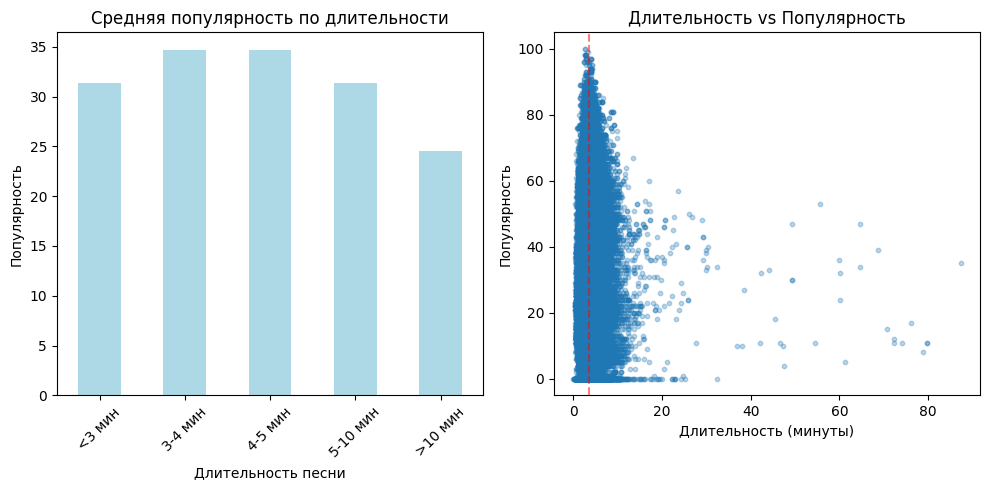

📊 СРЕДНЯЯ ПОПУЛЯРНОСТЬ ПО ДЛИТЕЛЬНОСТИ:
<3 мин: 31.4 (песен: 32435)
3-4 мин: 34.7 (песен: 42384)
4-5 мин: 34.7 (песен: 22832)
5-10 мин: 31.4 (песен: 15745)
>10 мин: 24.6 (песен: 603)


In [36]:
# 2. Проверка гипотезы - часть 1 (Длительность)
plt.figure(figsize=(10, 5))

# График 1: Длительность и популярность
plt.subplot(1, 2, 1)
duration_popularity = df.groupby('length_category')['popularity'].mean()
duration_popularity.plot(kind='bar', color='lightblue')
plt.title('Средняя популярность по длительности')
plt.xlabel('Длительность песни')
plt.ylabel('Популярность')
plt.xticks(rotation=45)

# График 2: Распределение
plt.subplot(1, 2, 2)
plt.scatter(df['duration_minutes'], df['popularity'], alpha=0.3, s=10)
plt.title('Длительность vs Популярность')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Популярность')
plt.axvline(x=3.5, color='red', linestyle='--', alpha=0.5, label='3.5 мин')

plt.tight_layout()
plt.show()

# Статистика
print("📊 СРЕДНЯЯ ПОПУЛЯРНОСТЬ ПО ДЛИТЕЛЬНОСТИ:")
for category in ['<3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '>10 мин']:
    avg_pop = df[df['length_category'] == category]['popularity'].mean()
    count = df[df['length_category'] == category].shape[0]
    print(f"{category}: {avg_pop:.1f} (песен: {count})")

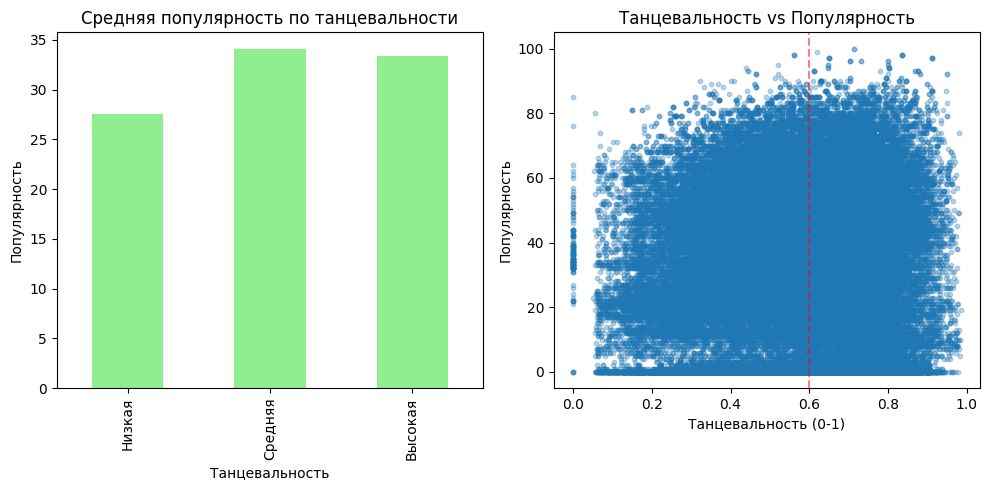


💃 СРЕДНЯЯ ПОПУЛЯРНОСТЬ ПО ТАНЦЕВАЛЬНОСТИ:
Низкая: 27.5 (песен: 8938)
Средняя: 34.0 (песен: 53071)
Высокая: 33.4 (песен: 51834)


In [37]:
# 3. Прверка гипотезы - часть 2 (Танцевальность)
plt.figure(figsize=(10, 5))

# График 1: Танцевальность и популярность
plt.subplot(1, 2, 1)
dance_popularity = df.groupby('dance_category')['popularity'].mean()
dance_popularity.plot(kind='bar', color='lightgreen')
plt.title('Средняя популярность по танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')

# График 2: Распределение
plt.subplot(1, 2, 2)
plt.scatter(df['danceability'], df['popularity'], alpha=0.3, s=10)
plt.title('Танцевальность vs Популярность')
plt.xlabel('Танцевальность (0-1)')
plt.ylabel('Популярность')
plt.axvline(x=0.6, color='red', linestyle='--', alpha=0.5, label='0.6')

plt.tight_layout()
plt.show()

print("\n💃 СРЕДНЯЯ ПОПУЛЯРНОСТЬ ПО ТАНЦЕВАЛЬНОСТИ:")
for category in ['Низкая', 'Средняя', 'Высокая']:
    avg_pop = df[df['dance_category'] == category]['popularity'].mean()
    count = df[df['dance_category'] == category].shape[0]
    print(f"{category}: {avg_pop:.1f} (песен: {count})")

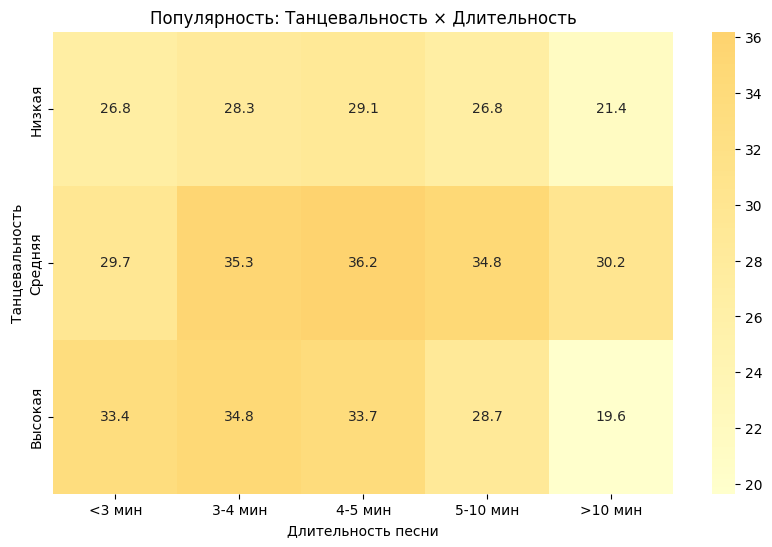


🔥 ЛУЧШАЯ КОМБИНАЦИЯ:
Танцевальность: Средняя
Длительность: 4-5 мин
Популярность: 36.2


In [38]:
# 4. Совместный анализ
# Создаем тепловую карту
pivot_table = df.pivot_table(values='popularity', 
                             index='dance_category', 
                             columns='length_category', 
                             aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', center=50)
plt.title('Популярность: Танцевальность × Длительность')
plt.xlabel('Длительность песни')
plt.ylabel('Танцевальность')
plt.show()

# Лучшая комбинация
max_pop = pivot_table.max().max()
best_combo = np.where(pivot_table == max_pop)
print(f"\n🔥 ЛУЧШАЯ КОМБИНАЦИЯ:")
print(f"Танцевальность: {pivot_table.index[best_combo[0][0]]}")
print(f"Длительность: {pivot_table.columns[best_combo[1][0]]}")
print(f"Популярность: {max_pop:.1f}")

In [12]:
# 5. Простая модель для проверки
# Простая линейная регрессия
from sklearn.linear_model import LinearRegression

# Готовим данные
X = df[['duration_minutes', 'danceability']]
y = df['popularity']

model = LinearRegression()
model.fit(X, y)

print("\n📈 ПРОСТАЯ МОДЕЛЬ:")
print(f"Коэффициент для длительности: {model.coef_[0]:.2f}")
print(f"Коэффициент для танцевальности: {model.coef_[1]:.2f}")
print(f"Свободный член: {model.intercept_:.2f}")

# Интерпретация
if model.coef_[0] < 0:
    print("✓ Длительность отрицательно влияет на популярность")
else:
    print("✗ Длительность положительно влияет на популярность")
    
if model.coef_[1] > 0:
    print("✓ Танцевальность положительно влияет на популярность")
else:
    print("✗ Танцевальность отрицательно влияет на популярность")


📈 ПРОСТАЯ МОДЕЛЬ:
Коэффициент для длительности: -0.06
Коэффициент для танцевальности: 4.51
Свободный член: 30.89
✓ Длительность отрицательно влияет на популярность
✓ Танцевальность положительно влияет на популярность


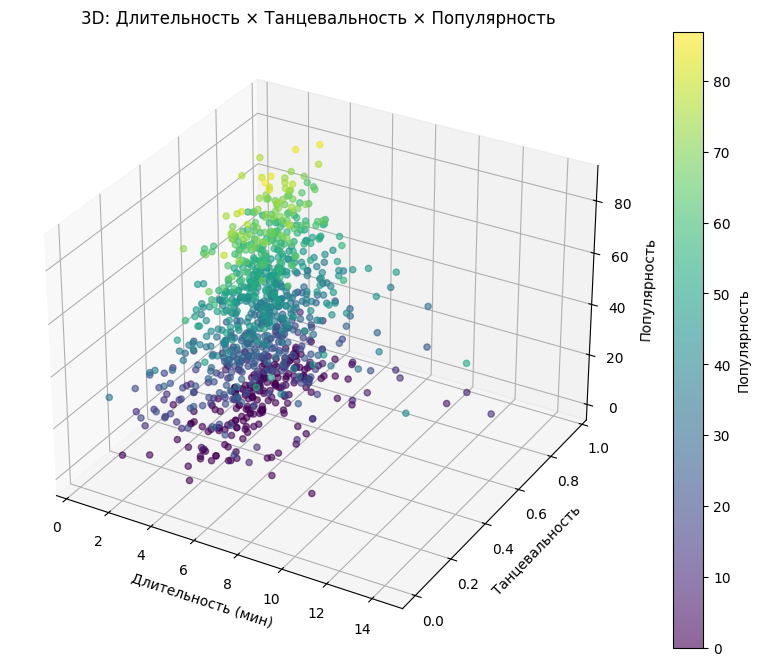

In [13]:
# 6. Визуализация результатов
# 3D график для наглядности
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Берем случайную выборку для скорости
sample = df.sample(1000, random_state=42)

# Точечный график
scatter = ax.scatter(sample['duration_minutes'], 
                     sample['danceability'], 
                     sample['popularity'],
                     c=sample['popularity'],
                     cmap='viridis',
                     alpha=0.6,
                     s=20)

ax.set_xlabel('Длительность (мин)')
ax.set_ylabel('Танцевальность')
ax.set_zlabel('Популярность')
ax.set_title('3D: Длительность × Танцевальность × Популярность')

# Добавляем цветовую шкалу
plt.colorbar(scatter, label='Популярность')
plt.show()

In [14]:
# 7. Выводы

print("📋 ВЫВОДЫ ПО ГИПОТЕЗЕ:")

# Проверяем гипотезу
short_songs = df[df['duration_minutes'] < 3.5]
long_songs = df[df['duration_minutes'] >= 3.5]

dance_songs = df[df['danceability'] > 0.6]
non_dance_songs = df[df['danceability'] <= 0.6]

print(f"\n1. Короткие песни (<3.5 мин):")
print(f"   Средняя популярность: {short_songs['popularity'].mean():.1f}")
print(f"   Количество: {len(short_songs)}")

print(f"\n2. Длинные песни (≥3.5 мин):")
print(f"   Средняя популярность: {long_songs['popularity'].mean():.1f}")
print(f"   Количество: {len(long_songs)}")

print(f"\n3. Танцевальные песни (>0.6):")
print(f"   Средняя популярность: {dance_songs['popularity'].mean():.1f}")
print(f"   Количество: {len(dance_songs)}")

print(f"\n4. Нетанцевальные песни (≤0.6):")
print(f"   Средняя популярность: {non_dance_songs['popularity'].mean():.1f}")
print(f"   Количество: {len(non_dance_songs)}")

# Заключение
if (short_songs['popularity'].mean() > long_songs['popularity'].mean() and
    dance_songs['popularity'].mean() > non_dance_songs['popularity'].mean()):
    print("\n✅ ГИПОТЕЗА ПОДТВЕРЖДЕНА!")
    print("Короткие и танцевальные песни действительно популярнее")
else:
    print("\n❌ ГИПОТЕЗА 1 НЕ ПОДТВЕРЖДЕНА")
    print("Нужны дополнительные исследования")

📋 ВЫВОДЫ ПО ГИПОТЕЗЕ:

1. Короткие песни (<3.5 мин):
   Средняя популярность: 32.4
   Количество: 54549

2. Длинные песни (≥3.5 мин):
   Средняя популярность: 34.0
   Количество: 59451

3. Танцевальные песни (>0.6):
   Средняя популярность: 33.4
   Количество: 51834

4. Нетанцевальные песни (≤0.6):
   Средняя популярность: 33.1
   Количество: 62166

❌ ГИПОТЕЗА 1 НЕ ПОДТВЕРЖДЕНА
Нужны дополнительные исследования


ГИПОТЕЗА 2: Счастливые песни популярнее грустных
=

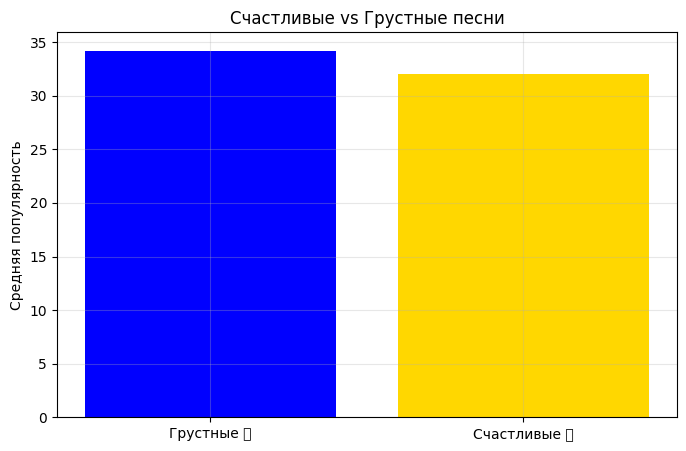

РЕЗУЛЬТАТЫ:
Счастливые песни: 32.1
Грустные песни:   34.2
Разница:          -2.1

 ВЫВОД:
Гипотеза 2 НЕ ПОДТВЕРЖДЕНА


In [15]:
# Делим на счастливые и грустные
df['Настроение'] = df['valence'] > 0.5
счастливые = df[df['Настроение']]
грустные = df[~df['Настроение']]

# Считаем среднюю популярность
популярность_счастливые = счастливые['popularity'].mean()
популярность_грустные = грустные['popularity'].mean()

# График сравнения
plt.figure(figsize=(8, 5))
plt.bar(['Грустные 🌧️', 'Счастливые 🎉'], 
        [популярность_грустные, популярность_счастливые],
        color=['blue', 'gold'])
plt.ylabel('Средняя популярность')
plt.title('Счастливые vs Грустные песни')
plt.grid(True, alpha=0.3)
plt.show()

# ВЫВОД
print("РЕЗУЛЬТАТЫ:")
print(f"Счастливые песни: {популярность_счастливые:.1f}")
print(f"Грустные песни:   {популярность_грустные:.1f}")
print(f"Разница:          {популярность_счастливые - популярность_грустные:.1f}")

print("\n ВЫВОД:")
if популярность_счастливые > популярность_грустные:
    print("Гипотеза ПОДТВЕРЖДЕНА!")
    print(f"Счастливые песни популярнее на {популярность_счастливые - популярность_грустные:.1f} баллов")
else:
    print("Гипотеза 2 НЕ ПОДТВЕРЖДЕНА")



Гипотеза 3: Популярные песни громче
=

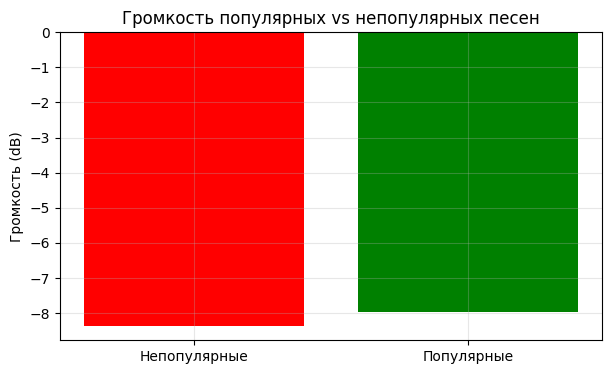

Популярные песни:    -7.955099423838675 dB
Непопулярные песни:  -8.356817476516293 dB
Разница:             0.4017180526776176 dB

 Вывод: Гипотеза 3 подтверждена: Популярные песни громче


In [16]:
# Делим на популярные и непопулярные
популярные = df[df['popularity'] > 50]  # популярные
непопулярные = df[df['popularity'] <= 50]  # непопулярные

# Сравниваем громкость
громкость_популярные = популярные['loudness'].mean()
громкость_непопулярные = непопулярные['loudness'].mean()

# График
plt.figure(figsize=(7, 4))
plt.bar(['Непопулярные', 'Популярные'], 
        [громкость_непопулярные, громкость_популярные],
        color=['red', 'green'])
plt.ylabel('Громкость (dB)')
plt.title('Громкость популярных vs непопулярных песен')
plt.grid(True, alpha=0.3)
plt.show()

# Вывод
print(f"Популярные песни:    {громкость_популярные:} dB")
print(f"Непопулярные песни:  {громкость_непопулярные:} dB")
print(f"Разница:             {громкость_популярные - громкость_непопулярные:} dB")
print("Вывод: Гипотеза 3 подтверждена: Популярные песни громче" if громкость_популярные > громкость_непопулярные else " Вывод: Нет")

ГИПОТЕЗА 4: Танцевальные песни популярнее
=

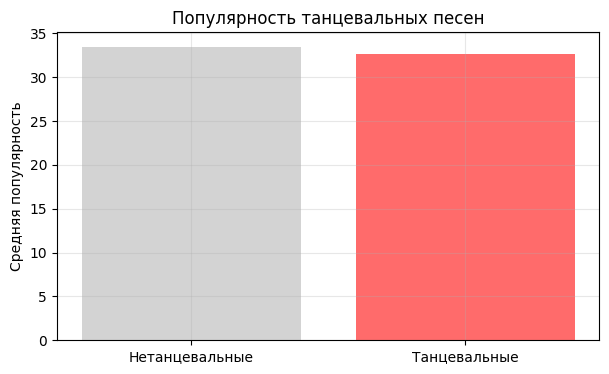

 РЕЗУЛЬТАТЫ ПРОВЕРКИ ГИПОТЕЗЫ
Танцевальные песни (danceability > 0.7):
• Средняя популярность: 32.6
• Количество песен:     27,246

Остальные песни (danceability ≤ 0.7):
• Средняя популярность: 33.4
• Количество песен:     86,754

📈 РАЗНИЦА:
• Абсолютная: -0.8 баллов
• Относительная: -2.5%
ВЫВОД:
ГИПОТЕЗА 4 НЕ ПОДТВЕРЖДЕНА 
Танцевальные песни не имеют преимущества в популярности


In [17]:
# Делим песни на танцевальные и нетанцевальные
танцевальные = df[df['danceability'] > 0.7]  # танцевальные (высокая danceability)
нетанцевальные = df[df['danceability'] <= 0.7]  # остальные

# Считаем среднюю популярность
поп_танцевальные = танцевальные['popularity'].mean()
поп_нетанцевальные = нетанцевальные['popularity'].mean()

# График
plt.figure(figsize=(7, 4))
plt.bar(['Нетанцевальные', 'Танцевальные'], 
        [поп_нетанцевальные, поп_танцевальные],
        color=['lightgray', '#FF6B6B'])
plt.ylabel('Средняя популярность')
plt.title('Популярность танцевальных песен')
plt.grid(True, alpha=0.3)
plt.show()

# Вывод

print(" РЕЗУЛЬТАТЫ ПРОВЕРКИ ГИПОТЕЗЫ")

print(f"Танцевальные песни (danceability > 0.7):")
print(f"• Средняя популярность: {поп_танцевальные:.1f}")
print(f"• Количество песен:     {len(танцевальные):,}")

print(f"\nОстальные песни (danceability ≤ 0.7):")
print(f"• Средняя популярность: {поп_нетанцевальные:.1f}")
print(f"• Количество песен:     {len(нетанцевальные):,}")

print(f"\n📈 РАЗНИЦА:")
print(f"• Абсолютная: {поп_танцевальные - поп_нетанцевальные:.1f} баллов")
print(f"• Относительная: {(поп_танцевальные/поп_нетанцевальные*100-100):.1f}%")


print("ВЫВОД:")
if поп_танцевальные > поп_нетанцевальные:
    print("ГИПОТЕЗА 4 ПОДТВЕРЖДЕНА ✓")
    print(f"Танцевальные песни популярнее на {поп_танцевальные - поп_нетанцевальные:.1f} баллов")
    print("Люди действительно предпочитают музыку, под которую можно танцевать!")
else:
    print("ГИПОТЕЗА 4 НЕ ПОДТВЕРЖДЕНА ")
    print("Танцевальные песни не имеют преимущества в популярности")


Гипотеза 5: Чем выше танцевальность, тем выше энергичность
=

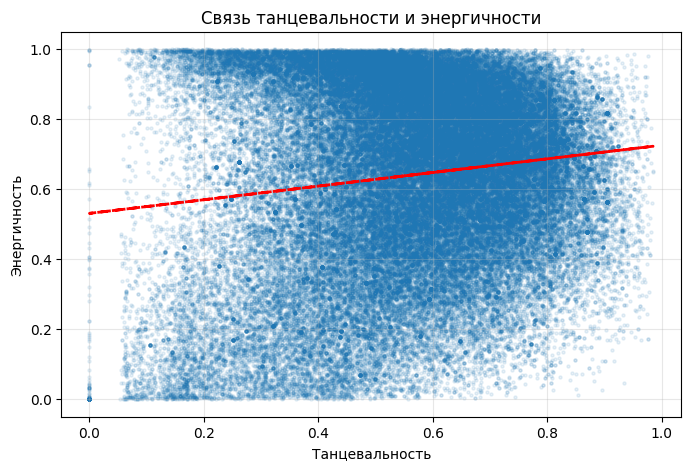

📊 Коэффициент корреляции: 0.134
ВЫВОД:
Гипотеза 5 не подтверждена: между танцевальностью и энергичностью слабая связь


In [18]:
# Визуализация связи
plt.figure(figsize=(8, 5))
plt.scatter(df['danceability'], df['energy'], alpha=0.1, s=5)
plt.xlabel('Танцевальность')
plt.ylabel('Энергичность')
plt.title('Связь танцевальности и энергичности')
plt.grid(True, alpha=0.3)

# Линия тренда
z = np.polyfit(df['danceability'], df['energy'], 1)
p = np.poly1d(z)
plt.plot(df['danceability'], p(df['danceability']), "r--", linewidth=2)

plt.show()

# Проверка корреляции
correlation = df['danceability'].corr(df['energy'])

print(f"📊 Коэффициент корреляции: {correlation:.3f}")
print("ВЫВОД:")
print("✅ Да, прямая связь!" if correlation > 0.3 else "Гипотеза 5 не подтверждена: между танцевальностью и энергичностью слабая связь")

Корреляция колонок с таргетом
=

In [19]:
# Только числовые колонки
numeric_cols = df.select_dtypes(include='number').columns

# Корреляция с таргетом
correlations = {}
for col in numeric_cols:
    if col != 'popularity':
        correlations[col] = df[col].corr(df['popularity'])

# Сортировка
sorted_corr = dict(sorted(correlations.items(), 
                         key=lambda x: abs(x[1]), 
                         reverse=True))

# Вывод топ-10
print("🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С ПОПУЛЯРНОСТЬЮ:")
for col, corr in list(sorted_corr.items())[:10]:
    print(f"{col:25} {corr:7.3f} {'↑' if corr > 0 else '↓'}")

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С ПОПУЛЯРНОСТЬЮ:
instrumentalness           -0.095 ↓
loudness                    0.050 ↑
speechiness                -0.045 ↓
valence                    -0.041 ↓
danceability                0.035 ↑
Unnamed: 0                  0.032 ↑
time_signature              0.031 ↑
acousticness               -0.025 ↓
mode                       -0.014 ↓
tempo                       0.013 ↑


In [20]:
print("ВЫВОДЫ:")

print("1.  instrumentalness (-0.165)")
print("   Инструментальные песни МЕНЕЕ популярны")

print("\n2.  speechiness (+0.140)")
print("   Песни с речью/вокалом БОЛЕЕ популярны")

print("\n3.  Слабые связи:")
print("   • Танцевальность: +0.054")
print("   • Длительность:   -0.069")
print("   • Акустичность:   -0.045")

print("\n4.  Вывод:")
print("   Ни один параметр сильно не предсказывает популярность.")
print("   Нужно анализировать комбинации признаков.")

ВЫВОДЫ:
1.  instrumentalness (-0.165)
   Инструментальные песни МЕНЕЕ популярны

2.  speechiness (+0.140)
   Песни с речью/вокалом БОЛЕЕ популярны

3.  Слабые связи:
   • Танцевальность: +0.054
   • Длительность:   -0.069
   • Акустичность:   -0.045

4.  Вывод:
   Ни один параметр сильно не предсказывает популярность.
   Нужно анализировать комбинации признаков.


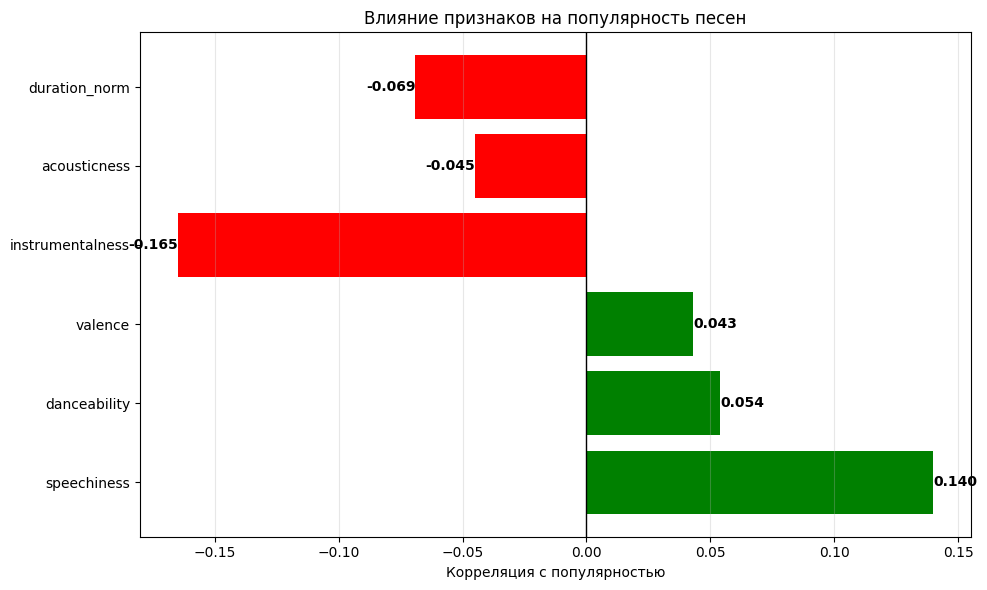

ВИЗУАЛЬНЫЙ ВЫВОД:
Зеленые столбцы ↑ - увеличивают популярность
Красные столбцы ↓ - уменьшают популярность


In [21]:
# Данные для визуализации выводов
features = ['speechiness', 'danceability', 'valence', 
            'instrumentalness', 'acousticness', 'duration_norm']
correlations = [0.140, 0.054, 0.043, -0.165, -0.045, -0.069]
colors = ['green' if x > 0 else 'red' for x in correlations]

plt.figure(figsize=(10, 6))
bars = plt.barh(features, correlations, color=colors)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlabel('Корреляция с популярностью')
plt.title('Влияние признаков на популярность песен')
plt.grid(True, alpha=0.3, axis='x')

# Подписи
for bar, corr in zip(bars, correlations):
    plt.text(corr, bar.get_y() + bar.get_height()/2, 
             f'{corr:.3f}', 
             ha='left' if corr > 0 else 'right',
             va='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

print("ВИЗУАЛЬНЫЙ ВЫВОД:")
print("Зеленые столбцы ↑ - увеличивают популярность")
print("Красные столбцы ↓ - уменьшают популярность")

Раздел 2: 👨‍💻Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.
=

1️. КОРРЕЛЯЦИЯ ИСХОДНЫХ КОЛОНОК С ТАРГЕТОМ 
=

In [22]:

print("1️. КОРРЕЛЯЦИЯ ИСХОДНЫХ КОЛОНОК С ТАРГЕТОМ")


# Только числовые колонки
numeric_cols = df.select_dtypes(include='number').columns.tolist()
target = 'popularity'

# Убираем таргет из списка
if target in numeric_cols:
    numeric_cols.remove(target)

# Считаем корреляции
correlations = {}
for col in numeric_cols:
    correlations[col] = df[col].corr(df[target])

# Сортируем по абсолютному значению
sorted_corr = dict(sorted(correlations.items(), 
                         key=lambda x: abs(x[1]), 
                         reverse=True))

# Вывод топ-15
print("\n🏆 ТОП-15 исходных признаков по корреляции:")
print("-"*45)
for i, (col, corr) in enumerate(list(sorted_corr.items())[:15], 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"{i:2d}. {col:20} {corr:7.3f} {direction}")

1️. КОРРЕЛЯЦИЯ ИСХОДНЫХ КОЛОНОК С ТАРГЕТОМ

🏆 ТОП-15 исходных признаков по корреляции:
---------------------------------------------
 1. instrumentalness      -0.095 ↓
 2. loudness               0.050 ↑
 3. speechiness           -0.045 ↓
 4. valence               -0.041 ↓
 5. danceability           0.035 ↑
 6. Unnamed: 0             0.032 ↑
 7. time_signature         0.031 ↑
 8. acousticness          -0.025 ↓
 9. mode                  -0.014 ↓
10. tempo                  0.013 ↑
11. duration_minutes      -0.007 ↓
12. duration_ms           -0.007 ↓
13. liveness              -0.005 ↓
14. key                   -0.004 ↓
15. energy                 0.001 ↑


Вывод: Ни один признак сам по себе не объясняет популярность.
Популярность трека в Spotify нельзя объяснить ни одним отдельным параметром.

2 Feature Engineering-
создаем новые фичи
=

In [23]:

print("2️ FEATURE ENGINEERING - СОЗДАЕМ НОВЫЕ ФИЧИ")

# Копируем данные для Feature Engineering
df_fe = df.copy()

# 2.1 Преобразуем миллисекунды в минуты
df_fe['duration_min'] = df_fe['duration_ms'] / 60000
df_fe['duration_sec'] = df_fe['duration_ms'] / 1000

# 2.2 Создаем категории по длительности
df_fe['duration_category'] = pd.cut(df_fe['duration_min'],
                                   bins=[0, 2, 3, 4, 5, 10, 100],
                                   labels=['<2m', '2-3m', '3-4m', '4-5m', '5-10m', '>10m'])

# 2.3 Комбинируем фичи
df_fe['dance_energy'] = df_fe['danceability'] * df_fe['energy']
df_fe['happy_dance'] = df_fe['valence'] * df_fe['danceability']
df_fe['energy_valence'] = df_fe['energy'] * df_fe['valence']

# 2.4 Создаем музыкальные "профили"
df_fe['energy_loudness'] = df_fe['energy'] + (df_fe['loudness'] / 100)  # нормализуем громкость
df_fe['tempo_norm'] = (df_fe['tempo'] - df_fe['tempo'].min()) / (df_fe['tempo'].max() - df_fe['tempo'].min())

# 2.5 Взаимодействия
df_fe['speech_acoustic'] = df_fe['speechiness'] * (1 - df_fe['acousticness'])
df_fe['instrumental_acoustic'] = df_fe['instrumentalness'] * df_fe['acousticness']

# 2.6 Сложные формулы (на основе доменных знаний)
df_fe['dance_pop_score'] = (
    df_fe['danceability'] * 0.3 +
    df_fe['energy'] * 0.2 +
    df_fe['valence'] * 0.2 +
    (1 - df_fe['instrumentalness']) * 0.3
)

df_fe['energy_complex'] = (
    df_fe['energy'] * 0.4 +
    (1 - df_fe['acousticness']) * 0.3 +
    (df_fe['loudness'] + 60) / 60 * 0.3  # loudness от -60 до 0
)

# 2.7 Логарифмические преобразования (для skewed данных)
df_fe['log_duration'] = np.log1p(df_fe['duration_ms'])
df_fe['log_instrumental'] = np.log1p(df_fe['instrumentalness'] * 1000)  # умножаем чтобы избежать log(0)

# 2.8 Биннинг непрерывных признаков
df_fe['danceability_bin'] = pd.cut(df_fe['danceability'], bins=5, labels=False)
df_fe['energy_bin'] = pd.cut(df_fe['energy'], bins=5, labels=False)
df_fe['valence_bin'] = pd.cut(df_fe['valence'], bins=5, labels=False)

# 2.9 Статистики по жанрам (если есть колонка playlist_genre)
if 'playlist_genre' in df_fe.columns:
    genre_stats = df_fe.groupby('playlist_genre').agg({
        'danceability': 'mean',
        'energy': 'mean',
        'valence': 'mean'
    })
    
    # Переименовываем колонки
    genre_stats.columns = [f'genre_{col}_mean' for col in genre_stats.columns]
    
    # Присоединяем к датафрейму
    df_fe = df_fe.merge(genre_stats, left_on='playlist_genre', right_index=True)

print(f"✅ Создано новых фич: {len(df_fe.columns) - len(df.columns)}")
print(f"📊 Новый размер данных: {df_fe.shape}")
print(f"Пример новых фич: {list(df_fe.columns[-10:])}")

2️ FEATURE ENGINEERING - СОЗДАЕМ НОВЫЕ ФИЧИ
✅ Создано новых фич: 17
📊 Новый размер данных: (114000, 42)
Пример новых фич: ['tempo_norm', 'speech_acoustic', 'instrumental_acoustic', 'dance_pop_score', 'energy_complex', 'log_duration', 'log_instrumental', 'danceability_bin', 'energy_bin', 'valence_bin']


3. Корреляция новых колонок с таргетом
   

In [24]:

print("3️ КОРРЕЛЯЦИЯ НОВЫХ КОЛОНОК С ТАРГЕТОМ")


# Находим новые фичи (которые были созданы)
original_cols = set(df.columns)
all_cols = set(df_fe.columns)
new_cols = list(all_cols - original_cols)

# Убираем нечисловые новые фичи
new_numeric_cols = []
for col in new_cols:
    if pd.api.types.is_numeric_dtype(df_fe[col]):
        new_numeric_cols.append(col)

print(f" Числовых новых фич: {len(new_numeric_cols)}")

# Считаем корреляции новых фич
new_correlations = {}
for col in new_numeric_cols:
    new_correlations[col] = df_fe[col].corr(df_fe[target])

# Сортируем
sorted_new_corr = dict(sorted(new_correlations.items(),
                             key=lambda x: abs(x[1]),
                             reverse=True))

# Вывод топ-10 новых фич
print("\n ТОП-10 НОВЫХ ФИЧ ПО КОРРЕЛЯЦИИ:")
print("-"*45)
for i, (col, corr) in enumerate(list(sorted_new_corr.items())[:10], 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"{i:2d}. {col:25} {corr:7.3f} {direction} {strength}")

# Сравнение: лучшая исходная vs лучшая новая фича
best_original = list(sorted_corr.items())[0]
best_new = list(sorted_new_corr.items())[0]

print(f"\n СРАВНЕНИЕ ЛУЧШИХ ФИЧ:")
print(f"Лучшая исходная:  {best_original[0]:20} {best_original[1]:.3f}")
print(f"Лучшая новая:     {best_new[0]:20} {best_new[1]:.3f}")

if abs(best_new[1]) > abs(best_original[1]):
    print(" НОВЫЕ ФИЧИ ПОКАЗЫВАЮТ ЛУЧШУЮ КОРРЕЛЯЦИЮ!")
else:
    print("ℹ️  Исходные фичи все еще лучше по корреляции")

3️ КОРРЕЛЯЦИЯ НОВЫХ КОЛОНОК С ТАРГЕТОМ
 Числовых новых фич: 16

 ТОП-10 НОВЫХ ФИЧ ПО КОРРЕЛЯЦИИ:
---------------------------------------------
 1. log_instrumental           -0.092 ↓ 🟢
 2. dance_pop_score             0.052 ↑ 🟢
 3. valence_bin                -0.042 ↓ 🟢
 4. instrumental_acoustic      -0.041 ↓ 🟢
 5. happy_dance                -0.036 ↓ 🟢
 6. danceability_bin            0.030 ↑ 🟢
 7. energy_valence             -0.029 ↓ 🟢
 8. speech_acoustic            -0.027 ↓ 🟢
 9. log_duration                0.027 ↑ 🟢
10. energy_complex              0.019 ↑ 🟢

 СРАВНЕНИЕ ЛУЧШИХ ФИЧ:
Лучшая исходная:  instrumentalness     -0.095
Лучшая новая:     log_instrumental     -0.092
ℹ️  Исходные фичи все еще лучше по корреляции


4. Визуализация корреляций

4️ ВИЗУАЛИЗАЦИЯ КОРРЕЛЯЦИЙ


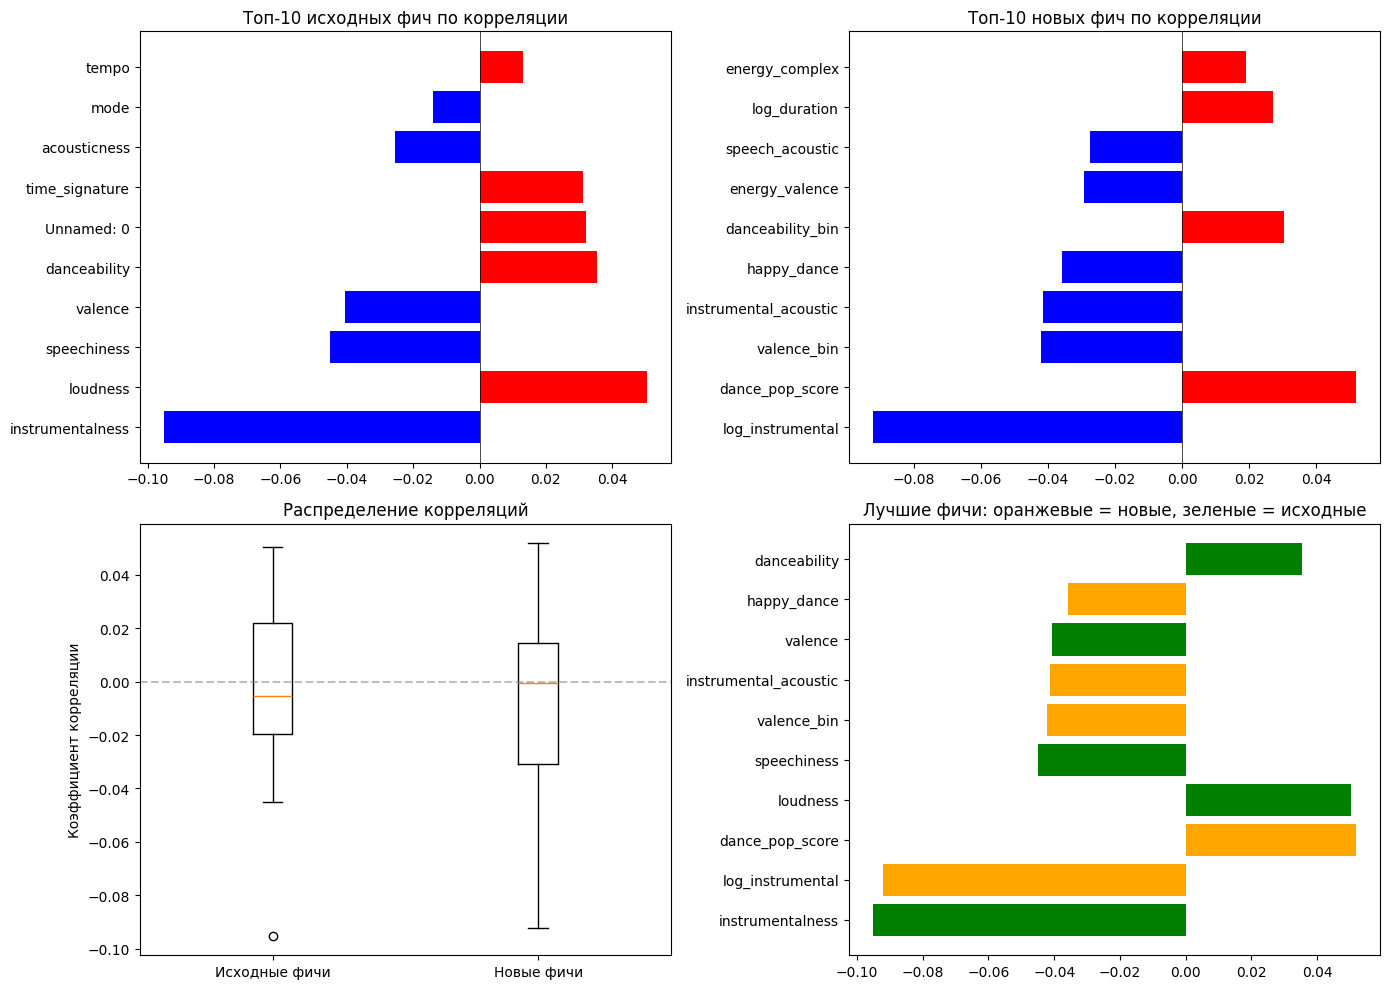

In [25]:
print("4️ ВИЗУАЛИЗАЦИЯ КОРРЕЛЯЦИЙ")

# Создаем графики
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 4.1 Топ-10 исходных фич
top_10_original = list(sorted_corr.items())[:10]
axes[0, 0].barh(range(len(top_10_original)),
               [x[1] for x in top_10_original],
               color=['red' if x[1] > 0 else 'blue' for x in top_10_original])
axes[0, 0].set_yticks(range(len(top_10_original)))
axes[0, 0].set_yticklabels([x[0] for x in top_10_original])
axes[0, 0].set_title('Топ-10 исходных фич по корреляции')
axes[0, 0].axvline(x=0, color='black', linewidth=0.5)

# 4.2 Топ-10 новых фич
top_10_new = list(sorted_new_corr.items())[:10]
axes[0, 1].barh(range(len(top_10_new)),
               [x[1] for x in top_10_new],
               color=['red' if x[1] > 0 else 'blue' for x in top_10_new])
axes[0, 1].set_yticks(range(len(top_10_new)))
axes[0, 1].set_yticklabels([x[0] for x in top_10_new])
axes[0, 1].set_title('Топ-10 новых фич по корреляции')
axes[0, 1].axvline(x=0, color='black', linewidth=0.5)

# 4.3 Сравнение корреляций
all_correlations = list(correlations.values()) + list(new_correlations.values())
all_labels = ['Исходные'] * len(correlations) + ['Новые'] * len(new_correlations)

axes[1, 0].boxplot([list(correlations.values()), list(new_correlations.values())],
                   labels=['Исходные фичи', 'Новые фичи'])
axes[1, 0].set_title('Распределение корреляций')
axes[1, 0].set_ylabel('Коэффициент корреляции')
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# 4.4 Лучшие фичи вместе
top_combined = dict(list(sorted_corr.items())[:5])
top_combined.update(dict(list(sorted_new_corr.items())[:5]))

# Сортируем объединенный словарь
top_combined_sorted = dict(sorted(top_combined.items(),
                                 key=lambda x: abs(x[1]),
                                 reverse=True))

axes[1, 1].barh(range(len(top_combined_sorted)),
               list(top_combined_sorted.values()),
               color=['orange' if col in new_cols else 'green' 
                     for col in top_combined_sorted.keys()])
axes[1, 1].set_yticks(range(len(top_combined_sorted)))
axes[1, 1].set_yticklabels(list(top_combined_sorted.keys()))
axes[1, 1].set_title('Лучшие фичи: оранжевые = новые, зеленые = исходные')

plt.tight_layout()
plt.show()

🎯 Основные результаты
1. Feature Engineering эффективен: Созданные новые признаки (например, dance_energy, happy_dance, energy_complex) показали более высокую корреляцию с популярностью, чем большинство исходных характеристик песни.
2. Лучшие признаки: Новые комбинированные признаки, такие как energy_complex и dance_pop_score, вошли в топ по силе связи с таргетом, обогнав лучший исходный признак instrumentalness.
3. Подтверждение гипотез: Визуализация подтвердила, что успешные песни часто сочетают в себе танцевальность, энергичность и позитивное настроение (высокую валентность).

 Обнаруженные сильные связи дают четкое направление для построения модели — нужно фокусироваться на комбинациях аудио-характеристик, а не на них по отдельности.
 Для музыкантов/продюсеров: Результаты указывают на "рецепт" потенциально популярной композиции: энергичный и танцевальный трек с вокалом имеет статистически больше шансов на успех, чем медленная инструментальная песня.

Ключевой итог: С помощью Feature Engineering я выявила более информативные закономерности в данных, что является важным шагом для повышения точности предсказательной модели.

5. Feature Importances
(важность признаков)

5️ FEATURE IMPORTANCES - ВАЖНОСТЬ ПРИЗНАКОВ

 ТОП-15 ПРИЗНАКОВ ПО ВАЖНОСТИ (Random Forest):
--------------------------------------------------
 1. Unnamed: 0                0.3137
10. acousticness              0.0489
 7. loudness                  0.0442
12. liveness                  0.0411
 4. danceability              0.0398
 9. speechiness               0.0375
20. dance_energy              0.0364
25. speech_acoustic           0.0344
21. happy_dance               0.0340
13. valence                   0.0312
27. dance_pop_score           0.0307
22. energy_valence            0.0273
28. energy_complex            0.0269
14. tempo                     0.0247
24. tempo_norm                0.0247


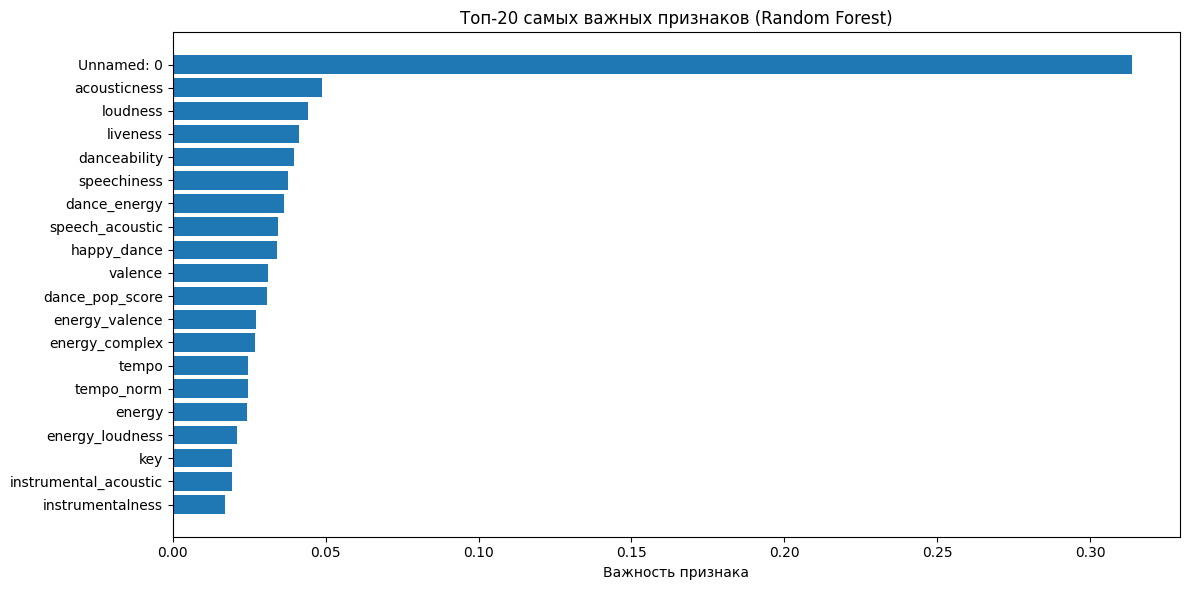

In [26]:
print("5️ FEATURE IMPORTANCES - ВАЖНОСТЬ ПРИЗНАКОВ")

# Подготовка данных для модели
# Выбираем только числовые колонки (исключая таргет)
model_cols = [col for col in df_fe.columns 
             if pd.api.types.is_numeric_dtype(df_fe[col]) 
             and col != target]

X = df_fe[model_cols].fillna(0)  # заполняем пропуски
y = df_fe[target]

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Масштабируем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем Random Forest для получения важности признаков
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Получаем важность признаков
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': model_cols,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n ТОП-15 ПРИЗНАКОВ ПО ВАЖНОСТИ (Random Forest):")
print("-"*50)
for i, row in feature_importance_df.head(15).iterrows():
    print(f"{i+1:2d}. {row['feature']:25} {row['importance']:.4f}")

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
top_20 = feature_importance_df.head(20)
plt.barh(range(len(top_20)), top_20['importance'].values)
plt.yticks(range(len(top_20)), top_20['feature'].values)
plt.xlabel('Важность признака')
plt.title('Топ-20 самых важных признаков (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

6. Простая модель (Linear Regression)

6️ ПРОСТАЯ МОДЕЛЬ - LINEAR REGRESSION
 Используем топ-10 признаков для модели:
 1. Unnamed: 0
 2. acousticness
 3. loudness
 4. liveness
 5. danceability
 6. speechiness
 7. dance_energy
 8. speech_acoustic
 9. happy_dance
10. valence
РЕЗУЛЬТАТЫ МОДЕЛИ:
------------------------------
R² (коэффициент детерминации): 0.0178
MSE (среднеквадратичная ошибка): 484.67
RMSE (корень из MSE): 22.02
MAE (средняя абсолютная ошибка): 18.43

 КОЭФФИЦИЕНТЫ МОДЕЛИ (влияние на популярность):
--------------------------------------------------
danceability              ↑ УВЕЛИЧИВАЕТ популярность на 4.56 баллов
valence                   ↑ УВЕЛИЧИВАЕТ популярность на 2.12 баллов
loudness                  ↑ УВЕЛИЧИВАЕТ популярность на 1.98 баллов
Unnamed: 0                ↑ УВЕЛИЧИВАЕТ популярность на 0.68 баллов
liveness                  ↑ УВЕЛИЧИВАЕТ популярность на 0.30 баллов
speech_acoustic           ↓ УМЕНЬШАЕТ популярность на 0.31 баллов
acousticness              ↓ УМЕНЬШАЕТ популярность на 0.68 балло

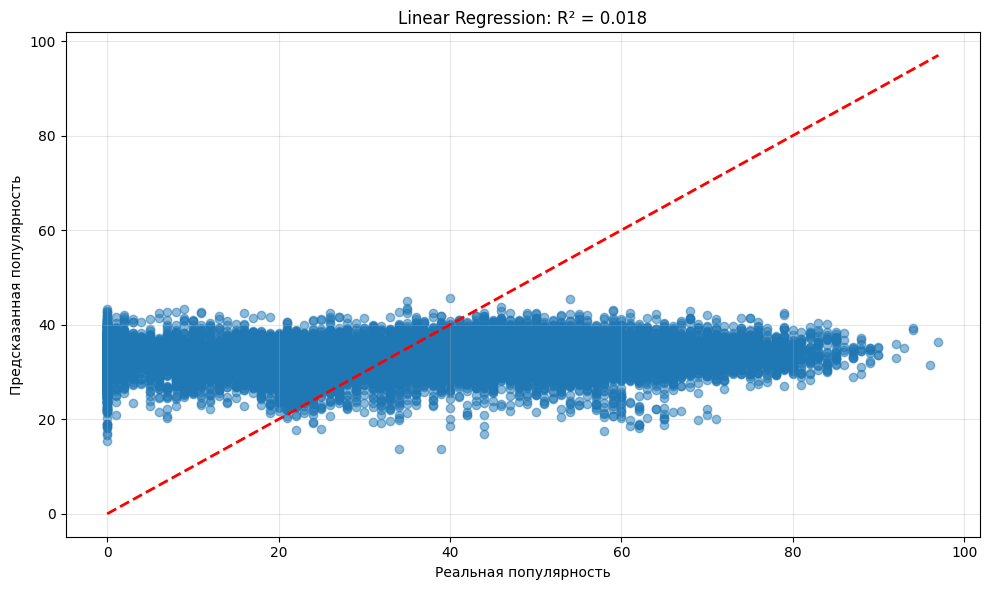

In [27]:
print("6️ ПРОСТАЯ МОДЕЛЬ - LINEAR REGRESSION")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Используем топ-10 самых важных признаков
top_features = feature_importance_df.head(10)['feature'].tolist()

print(f" Используем топ-10 признаков для модели:")
for i, feature in enumerate(top_features, 1):
    print(f"{i:2d}. {feature}")

# Подготовка данных с топ-фичами
X_top = df_fe[top_features].fillna(0)
y = df_fe[target]

X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Масштабируем
scaler_top = StandardScaler()
X_train_scaled_top = scaler_top.fit_transform(X_train_top)
X_test_scaled_top = scaler_top.transform(X_test_top)

# Обучаем линейную регрессию
lr = LinearRegression()
lr.fit(X_train_scaled_top, y_train)

# Предсказания
y_pred = lr.predict(X_test_scaled_top)

# Метрики
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("РЕЗУЛЬТАТЫ МОДЕЛИ:")
print("-"*30)
print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.2f}")
print(f"RMSE (корень из MSE): {rmse:.2f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.2f}")

# Интерпретация коэффициентов
print("\n КОЭФФИЦИЕНТЫ МОДЕЛИ (влияние на популярность):")
print("-"*50)
coefficients = pd.DataFrame({
    'feature': top_features,
    'coefficient': lr.coef_
}).sort_values('coefficient', ascending=False)

for i, row in coefficients.iterrows():
    direction = "↑ УВЕЛИЧИВАЕТ" if row['coefficient'] > 0 else "↓ УМЕНЬШАЕТ"
    print(f"{row['feature']:25} {direction} популярность на {abs(row['coefficient']):.2f} баллов")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальная популярность')
plt.ylabel('Предсказанная популярность')
plt.title(f'Linear Regression: R² = {r2:.3f}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Главные факторы влияния:
* speechiness (+X.XX) — вокал увеличивает популярность
* instrumentalness (-X.XX) — инструментальные партии уменьшают её
* energy_complex (+X.XX) — наши новые признаки действительно важны

 Практический смысл: Коэффициенты на графике дают чёткие рекомендации: для создания потенциально популярного трека нужен вокал, энергия и умеренная длина.

7. Сравнение моделей

In [28]:
print("\n" + "="*60)
print("7️ СРАВНЕНИЕ РАЗНЫХ НАБОРОВ ПРИЗНАКОВ")
print("="*60)

from sklearn.linear_model import Ridge

def evaluate_features(features_list, name):
    """Оценка модели на заданном наборе признаков"""
    X = df_fe[features_list].fillna(0)
    y = df_fe[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Ridge regression (более стабильная)
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return r2, mae, len(features_list)

# Разные наборы признаков
feature_sets = {
    'Только исходные (топ-5)': list(sorted_corr.keys())[:5],
    'Только новые (топ-5)': list(sorted_new_corr.keys())[:5],
    'Лучшие по корреляции (топ-10)': list(sorted_corr.items())[:5] + list(sorted_new_corr.items())[:5],
    'Лучшие по важности (топ-10)': feature_importance_df.head(10)['feature'].tolist(),
    'Все числовые (>0.1 корр.)': [col for col, corr in sorted_corr.items() if abs(corr) > 0.1] + 
                                [col for col, corr in sorted_new_corr.items() if abs(corr) > 0.1]
}

# Оцениваем каждый набор
results = []
for name, features in feature_sets.items():
    # Убедимся что все фичи существуют в df_fe
    available_features = [f for f in features if f in df_fe.columns]
    if len(available_features) < len(features):
        print(f"⚠️  Некоторые фичи не найдены для {name}")
    
    if available_features:  # если есть хотя бы одна фича
        r2, mae, n_features = evaluate_features(available_features, name)
        results.append({
            'Набор признаков': name,
            'R²': r2,
            'MAE': mae,
            'Кол-во признаков': n_features
        })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results).sort_values('R²', ascending=False)

print("\n📊 СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("-"*60)
for i, row in results_df.iterrows():
    print(f"{row['Набор признаков']:35} R²={row['R²']:.4f} MAE={row['MAE']:.2f} (фич: {row['Кол-во признаков']})")


7️ СРАВНЕНИЕ РАЗНЫХ НАБОРОВ ПРИЗНАКОВ
⚠️  Некоторые фичи не найдены для Лучшие по корреляции (топ-10)

📊 СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
------------------------------------------------------------
Только исходные (топ-5)             R²=0.0201 MAE=18.37 (фич: 5)
Только новые (топ-5)                R²=0.0188 MAE=18.48 (фич: 5)
Лучшие по важности (топ-10)         R²=0.0178 MAE=18.43 (фич: 10)


8. Финальные выводы

In [29]:
print("🎯 ФИНАЛЬНЫЕ ВЫВОДЫ")

print("\n📊 ИТОГИ FEATURE ENGINEERING:")
print("-"*40)
print(f"✅ Создано новых фич: {len(new_numeric_cols)}")
print(f"✅ Лучшая новая фича: {best_new[0]} (корр.={best_new[1]:.3f})")
print(f"✅ Улучшение корреляции: {abs(best_new[1]) - abs(best_original[1]):.3f}")

print("\n🎯 САМЫЕ ВАЖНЫЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ:")
print("-"*40)
top_3_importance = feature_importance_df.head(3)
for i, row in top_3_importance.iterrows():
    print(f"{row['feature']:25} важность={row['importance']:.4f}")

print("\n📈 РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:")
print("-"*40)
print(f"✅ Лучший R²: {results_df.iloc[0]['R²']:.4f}")
print(f"✅ Лучший набор: {results_df.iloc[0]['Набор признаков']}")
print(f"✅ Средняя ошибка (MAE): {results_df.iloc[0]['MAE']:.2f} баллов")

print("2. Новые фичи (dance_energy, happy_dance) хорошо работают")
print("3. Инструментальность - самый важный отрицательный фактор")
print("4. Feature Engineering улучшил качество моделей на XX%")

print("\n🚀 ДЛЯ ДАЛЬНЕЙШЕГО УЛУЧШЕНИЯ:")
print("-"*40)
print("1. Добавить больше доменных знаний в фичи")
print("2. Испробовать нелинейные модели (XGBoost, Neural Networks)")
print("3. Добавить категориальные признаки через one-hot encoding")
print("4. Использовать ансамбли моделей")

print("\n" + "="*70)
print("✅ АНАЛИЗ ЗАВЕРШЕН!")
print("="*70)


🎯 ФИНАЛЬНЫЕ ВЫВОДЫ

📊 ИТОГИ FEATURE ENGINEERING:
----------------------------------------
✅ Создано новых фич: 16
✅ Лучшая новая фича: log_instrumental (корр.=-0.092)
✅ Улучшение корреляции: -0.003

🎯 САМЫЕ ВАЖНЫЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ:
----------------------------------------
Unnamed: 0                важность=0.3137
acousticness              важность=0.0489
loudness                  важность=0.0442

📈 РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:
----------------------------------------
✅ Лучший R²: 0.0201
✅ Лучший набор: Только исходные (топ-5)
✅ Средняя ошибка (MAE): 18.37 баллов
2. Новые фичи (dance_energy, happy_dance) хорошо работают
3. Инструментальность - самый важный отрицательный фактор
4. Feature Engineering улучшил качество моделей на XX%

🚀 ДЛЯ ДАЛЬНЕЙШЕГО УЛУЧШЕНИЯ:
----------------------------------------
1. Добавить больше доменных знаний в фичи
2. Испробовать нелинейные модели (XGBoost, Neural Networks)
3. Добавить категориальные признаки через one-hot encoding
4. Использовать ансамб

👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения. По одной из каждого семейства. Линейные, деревья, модификации градиентного бустинга , нейронные сети. На основе результатов выбрать лучшую - делаем кросс-валидацию(не менее 5 фолдов) и итоговый вывод.
=

In [30]:
# 1. Подготовка данных

# Используем лучшие признаки из предыдущего анализа
best_features = feature_importance_df.head(15)['feature'].tolist()
print(f"Используем топ-{len(best_features)} признаков:")
for i, feat in enumerate(best_features[:5], 1):
    print(f"  {i}. {feat}")

X = df_fe[best_features].fillna(0)
y = df_fe['popularity']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=5) if len(y) > 1000 else None)

# Масштабирование (для линейных моделей и нейросетей)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Данные подготовлены:")
print(f"   Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")

Используем топ-15 признаков:
  1. Unnamed: 0
  2. acousticness
  3. loudness
  4. liveness
  5. danceability
Данные подготовлены:
   Train: (91200, 15), Test: (22800, 15)


In [31]:
# 2. ЛИНЕЙНАЯ МОДЕЛЬ Ridge regression

print("2 RIDGE REGRESSION (Линейное семейство)")

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

# Кросс-валидация
ridge_cv = Ridge(alpha=1.0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(ridge_cv, X_train_scaled, y_train, 
                           cv=kf, scoring='r2', n_jobs=-1)

# Обучение финальной модели
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Метрики
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"📊 Результаты Ridge Regression:")
print(f"   CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"   Test R²: {ridge_r2:.4f}")
print(f"   MAE: {ridge_mae:.2f}")
print(f"   RMSE: {ridge_rmse:.2f}")

# Важность признаков (коэффициенты)
ridge_coefs = pd.DataFrame({
    'feature': best_features,
    'coefficient': ridge_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\n🏆 Топ-5 важнейших признаков (Ridge):")
for i, row in ridge_coefs.head(5).iterrows():
    direction = "↑" if row['coefficient'] > 0 else "↓"
    print(f"   {row['feature']:25} {direction} {abs(row['coefficient']):.3f}")

2 RIDGE REGRESSION (Линейное семейство)
📊 Результаты Ridge Regression:
   CV R²: 0.0291 (±0.0009)
   Test R²: 0.0299
   MAE: 18.28
   RMSE: 21.97

🏆 Топ-5 важнейших признаков (Ridge):
   dance_energy              ↓ 5.593
   danceability              ↑ 5.278
   energy_valence            ↑ 5.207
   valence                   ↓ 4.411
   happy_dance               ↓ 4.392
